IA & Data science (LU3IN0226) -- 2022-2023
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

Alallah Yassine

Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.

Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

Les groupes de plus de 2 personnes ne sont pas autorisés.

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-2</tt> et rajouter à la suite de <tt>projet-2</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-2-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 2 - avril-mai 2023


<font size="+1" color="RED"><b>Date de rendu : lundi 22 mai 2023, avant 18h</b></font>
    
<b>Attention! le site Moodle ferme à 18h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...

Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données fournies dans le répertoire `data`.

## Travail à faire

Appliquer les algorithmes d'apprentissage vus tout au long du semestre sur les données afin de mettre en évidence des résultats intéressants.
Deux problèmes, au moins, doivent être traités:
- un problème d'apprentissage supervisé
- un problème d'apprentissage non supervisé


## Travail à rendre
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce notebook complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre librairie iads sous la forme d'une archive avec votre répertoire `iads/` contenant tous les fichiers nécessaires 
- un fichier PDF dont le nom est de la forme: *projet-1-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: 
- Les fichiers de données ne doivent pas être inclus dans votre archive ! 
- Pensez à vérifier que votre archive contient bien tous les fichiers demandés et QUE les fichiers demandés.

## Soutenance des projets
La soutenance aura lieu le <font size="+1" color="RED">**mercredi 24 mai 2023**</font>, à partir de 14h. Un ordre de passage ainsi que la salle de TME où aura lieu les soutenances seront affichées sur le Moodle la veille.

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.




**Très important** : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- projet/
              -- ce_notebook.ipynb
              -- data/
                  -- AGRIBALYSE3-ingredients.csv
                  -- AGRIBALYSE3-etapes.csv
                  -- AGRIBALYSE3-synthese.csv


Dans le notebook que vous rendrez, le chargement des fichiers de données considèrera donc cette arborescence.


# Les données Agribalyse (version 3.1)

Les données sont issues des données publiques du site de l'ADEME: https://agribalyse.ademe.fr/
Il est conseillé de parcourir la documentation de ces données sur le site ci-dessus pour se familiariser avec les différentes informations qu'elles fournissent.

Pour ce projet, vous travaillerez sur les données sur les produits alimentaires dont la version originale est visible ici : https://doc.agribalyse.fr/documentation/acces-donnees

Si vous n'arrivez pas à télécharger ou à ouvrir ce fichier, des versions de ce fichier au format libreoffice et au format Excel 97 sont fournies dans l'archive `data_tableur`. Il est conseillé de regarder un de ces fichiers car vous y trouverez des informations complémentaires sur les noms des colonnes des 3 fichiers CSV de `data` décrits ci-dessous.

Pour vous aider à manipuler les données nous vous fournissons dans l'archive `data` : les 3 tables du fichiers sont fournies sous la forme de 3 fichiers CSV directement lisibles par la commande `read_csv` de Pandas (le séparateur de colonnes est le `';'`). Ce sont ces 3 fichiers à utiliser dans votre notebook. Un exemple de chargement est donné plus loin dans ce notebook. Les fichiers sont:
- AGRIBALYSE3-ingredients.csv
- AGRIBALYSE3-etapes.csv
- AGRIBALYSE3-synthese.csv

**Remarque**: les données Agribalyse de 2021 ont fait l'objet du projet de l'an dernier, cette année c'est une nouvelle version étendue de ces données qui sont utilisées pour ce projet, nous attendons donc des analyses qui tirent partie des nouveautés de cette nouvelle version.

## Exemples

In [1]:
# Importation des librairies standards:
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

# Librairie pour manipuler les colormaps:
import matplotlib.cm as cm

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire frère du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev

# importation de Clustering
from iads import Clustering as clust

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

## Analyse des différents datasets

Nous allons commencer par prendre en main les données, afin d'essayer de comprendre le contenu de nos différents datasets, d'en saisir la pertinence et l'importance de chacun des attributs.

## Dataset des données de synthèse

In [2]:
data_synthese = pd.read_csv("data/AGRIBALYSE3-synthese.csv", sep=';') 
data_synthese.columns
print("Nombre de lignes: ",len(data_synthese))
print("Nombre de colonnes: ",len(data_synthese.columns))

Nombre de lignes:  2517
Nombre de colonnes:  29


In [3]:
for i in range(0,len(data_synthese.columns)):
    if i>10:
        print("col ",i,": ",data_synthese.columns[i], "\tmoyenne = ",data_synthese[data_synthese.columns[i]].mean())
    else:
        print("col ",i,": ",data_synthese.columns[i])

col  0 :  Code AGB
col  1 :  Code CIQUAL
col  2 :  Groupe d'aliment
col  3 :  Sous-groupe d'aliment
col  4 :  Nom du Produit en Français
col  5 :  LCI Name
col  6 :  code saison
col  7 :  code avion
col  8 :  Livraison
col  9 :  Matériau d'emballage
col  10 :  Préparation
col  11 :  DQR 	moyenne =  2.7681644815256257
col  12 :  Score unique EF 3.1 	moyenne =  0.6889596344854987
col  13 :  Changement climatique 	moyenne =  5.420519666269368
col  14 :  Appauvrissement de la couche d'ozone 	moyenne =  5.383361620977354e-07
col  15 :  Rayonnements ionisants 	moyenne =  1.016821692491061
col  16 :  Formation photochimique d'ozone 	moyenne =  0.021625918156535556
col  17 :  Particules fines 	moyenne =  5.735583075089393e-07
col  18 :  Effets toxicologiques sur la santé humaine : substances non-cancérogènes 	moyenne =  1.0743762415574097e-07
col  19 :  Effets toxicologiques sur la santé humaine : substances cancérogènes 	moyenne =  3.8854543504171635e-09
col  20 :  Acidification terrestre et 

In [4]:
data_synthese.head()

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,code saison,code avion,Livraison,Matériau d'emballage,...,Effets toxicologiques sur la santé humaine : substances cancérogènes,Acidification terrestre et eaux douces,Eutrophisation eaux douces,Eutrophisation marine,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux
0,11084,11084,aides culinaires et ingrédients divers,algues,"Agar (algue), cru","Seaweed, agar, raw",2,0,Ambiant (long),LDPE,...,6.480000e-09,0.09970,0.001870,0.01330,0.12700,44.60,26.5,3.10,315.00,0.000088
1,11023,11023,aides culinaires et ingrédients divers,herbes,"Ail séché, poudre","Garlic, powder, dried",2,0,Ambiant (long),Verre,...,4.660000e-10,0.00622,0.000124,0.00232,0.01270,5.83,20.2,2.52,12.70,0.000007
2,11000,11000,aides culinaires et ingrédients divers,herbes,"Ail, cru","Garlic, fresh",2,0,Ambiant (long),Pas d'emballage,...,2.980000e-10,0.00200,0.000068,0.00212,0.00628,4.09,18.5,3.02,6.23,0.000004
3,11093,11093,aides culinaires et ingrédients divers,herbes,"Aneth, frais","Dill, fresh",2,0,Ambiant (long),LDPE,...,6.190000e-10,0.00811,0.000203,0.00405,0.03120,5.68,36.4,5.29,12.60,0.000005
4,20995,20995,aides culinaires et ingrédients divers,algues,"Ao-nori (Enteromorpha sp.), séchée ou déshydratée","Sea lettuce (Enteromorpha sp.), dried or dehyd...",2,0,Ambiant (long),LDPE,...,6.480000e-09,0.09970,0.001870,0.01330,0.12700,44.60,26.5,3.10,315.00,0.000088


/tmp/ipykernel_13543/1764835411.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data_synthese.hist(ax=ax, layout=(8,3), alpha=1)


array([[<AxesSubplot: title={'center': 'Code CIQUAL'}>,
        <AxesSubplot: title={'center': 'code saison'}>,
        <AxesSubplot: title={'center': 'code avion'}>],
       [<AxesSubplot: title={'center': 'DQR'}>,
        <AxesSubplot: title={'center': 'Score unique EF 3.1'}>,
        <AxesSubplot: title={'center': 'Changement climatique'}>],
       [<AxesSubplot: title={'center': "Appauvrissement de la couche d'ozone"}>,
        <AxesSubplot: title={'center': 'Rayonnements ionisants'}>,
        <AxesSubplot: title={'center': "Formation photochimique d'ozone"}>],
       [<AxesSubplot: title={'center': 'Particules fines'}>,
        <AxesSubplot: title={'center': 'Effets toxicologiques sur la santé humaine\xa0: substances non-cancérogènes'}>,
        <AxesSubplot: title={'center': 'Effets toxicologiques sur la santé humaine\xa0: substances cancérogènes'}>],
       [<AxesSubplot: title={'center': 'Acidification terrestre et eaux douces'}>,
        <AxesSubplot: title={'center': 'Eutroph

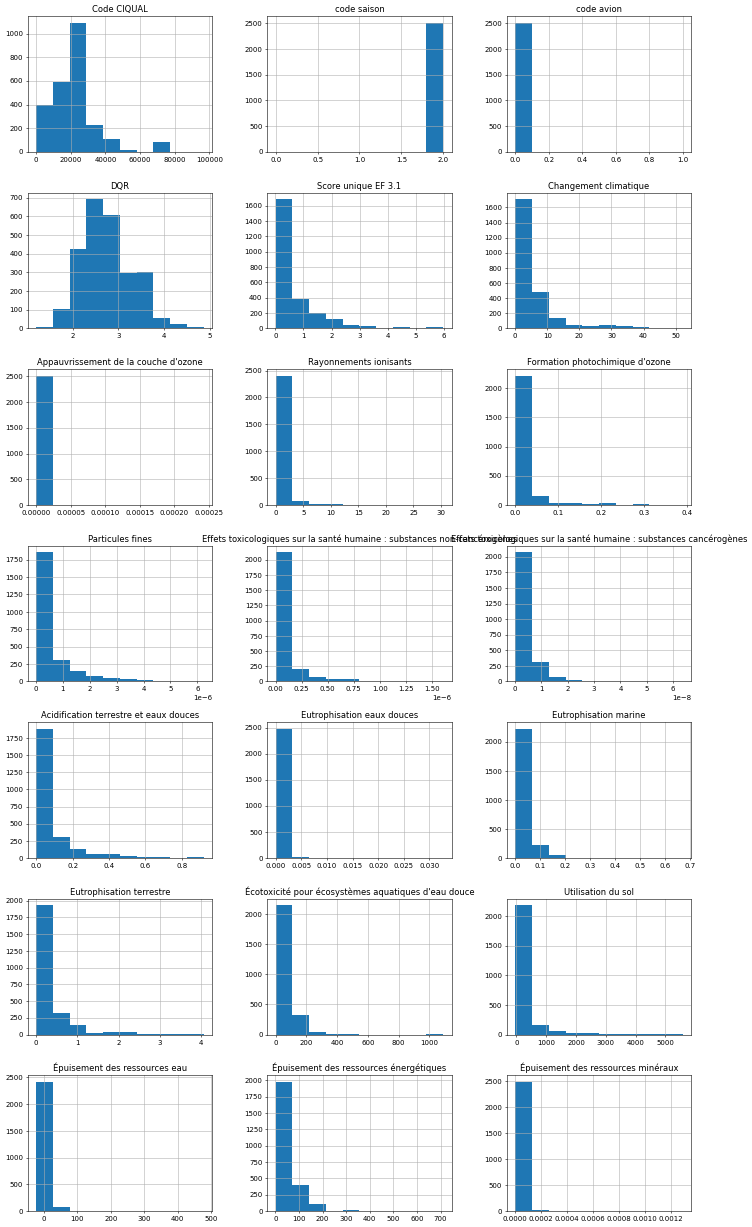

In [5]:
from math import ceil

fig, ax = plt.subplots(figsize=(3.5 * 4, 3.5 * ceil(len(data_synthese.columns)/4)), dpi=50)
fig.tight_layout()
data_synthese.hist(ax=ax, layout=(8,3), alpha=1)

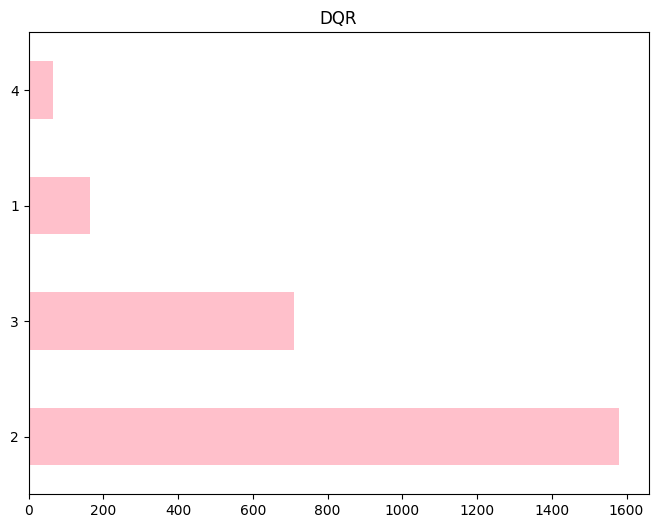

In [6]:
plt.figure(figsize=(8, 6))
plt.title("DQR")
data_synthese["DQR"].copy().astype(int).value_counts().plot.barh(color='pink')
plt.show()

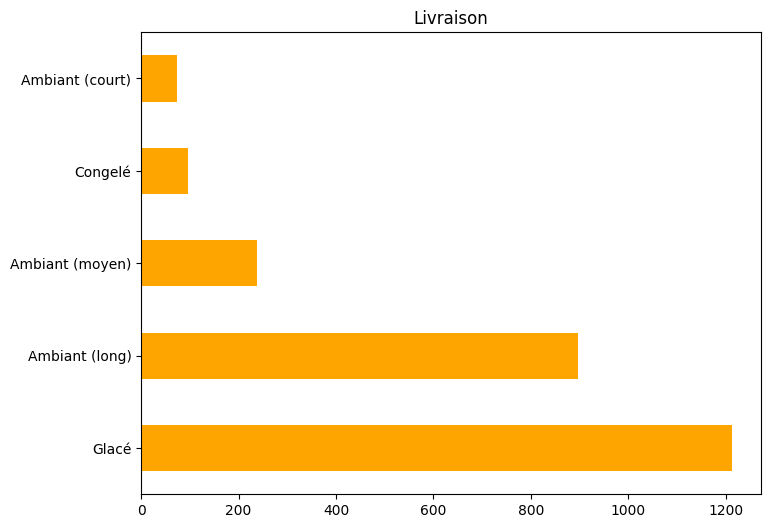

In [7]:
plt.figure(figsize=(8, 6))
plt.title("Livraison")
data_synthese["Livraison"].value_counts().plot.barh(color='orange')
plt.show()

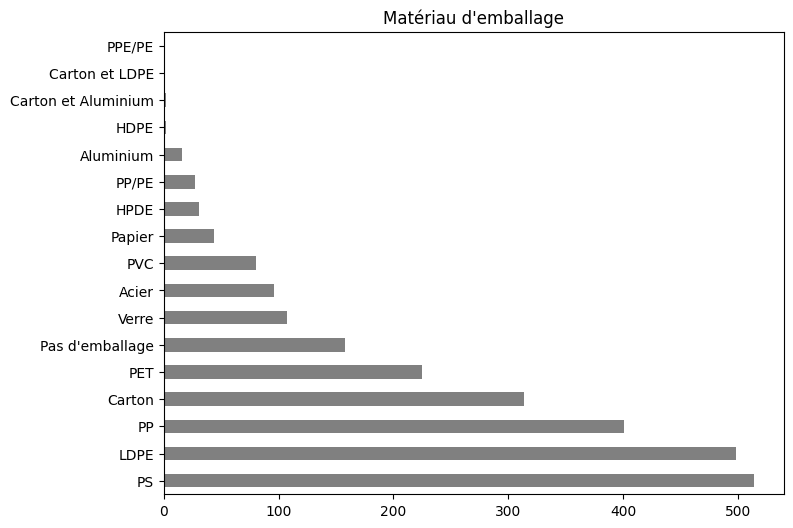

In [8]:
plt.figure(figsize=(8, 6))
plt.title("Matériau d'emballage")
data_synthese["Matériau d'emballage"].value_counts().plot.barh(color='grey')
plt.show()

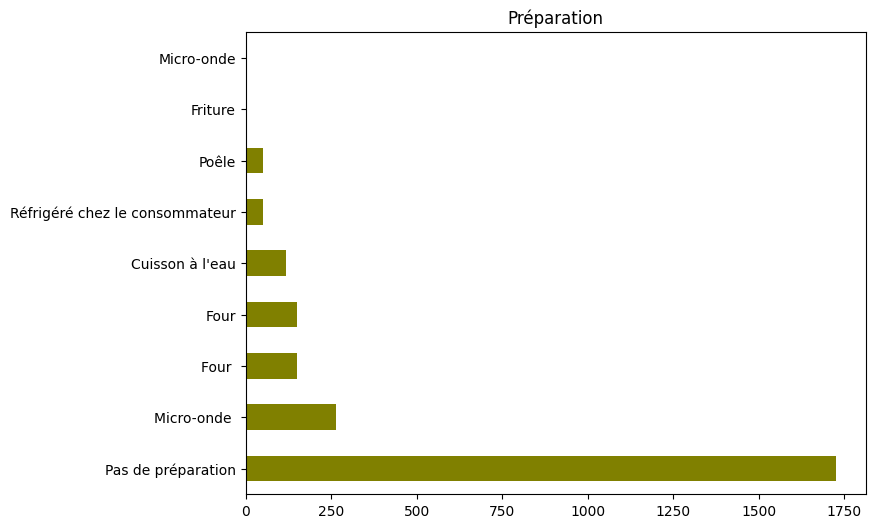

In [9]:
plt.figure(figsize=(8, 6))
plt.title("Préparation")
data_synthese["Préparation"].value_counts().plot.barh(color='olive')
plt.show()

Pour chaque catégorie de produit, un score unique ("Single Score") est calculé à partir des 16 indicateurs d'impact. Il est exprimé en points (Pts) pour 100g de produit fini. Plus ce score est élevé, plus l'impact sur l'environnement est fort. 1 point correspond à l'impact environnemental moyen d'un citoyen européen sur 1 an (en 2010). Pour un produit alimentaire, ce score est compris généralement entre ~0 (aucun impact) et 0,004 point (impacts très importants) par kilo de produits finis tel que consommé.

<Figure size 800x600 with 0 Axes>

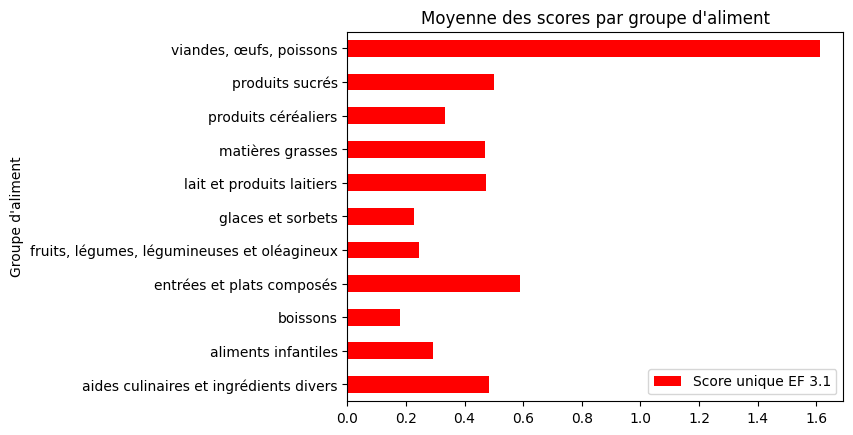

In [10]:
group_score = data_synthese[['Groupe d\'aliment', 'Score unique EF 3.1']]
plt.figure(figsize=(8, 6))
group_score.groupby('Groupe d\'aliment').mean().plot.barh(color='red', label='Moyenne')
plt.title('Moyenne des scores par groupe d\'aliment')
plt.show()

## Dataset des données des différents ingrédients

In [11]:
data_ingredients = pd.read_csv("data/AGRIBALYSE3-ingredients.csv",sep=";")
data_ingredients.columns
print("Nombre de lignes: ",len(data_ingredients))
print("Nombre de colonnes: ",len(data_ingredients.columns))

Nombre de lignes:  6856
Nombre de colonnes:  27


In [12]:
for i in range(0,len(data_ingredients.columns)):
    if i<10:
        print(i,": ", data_ingredients.columns[i])
    else:
        print(i,": ", data_ingredients.columns[i], \
              "\tmoyennne = ", data_ingredients[data_ingredients.columns[i]].mean())

0 :  Ciqual AGB
1 :  Ciqual code
2 :  Groupe d'aliment
3 :  Sous-groupe d'aliment
4 :  Nom Français
5 :  LCI Name
6 :  Ingredients
7 :  Code et Nom
8 :  Groupe
9 :  Sous-groupe
10 :  Formation photochimique d'ozone 	moyennne =  0.14901077587806652
11 :  Particules fines 	moyennne =  1.1694919040652128
12 :  Effets toxicologiques sur la santé humaine : substances non-cancérogènes 	moyennne =  9.663670448533454e-08
13 :  Effets toxicologiques sur la santé humaine : substances cancérogènes 	moyennne =  0.32177220746506685
14 :  Acidification terrestre et eaux douces 	moyennne =  0.0038680513541169783
15 :  Eutrophisation eaux douces 	moyennne =  1.1525166083035649e-07
16 :  Eutrophisation marine 	moyennne =  2.5530761424091264e-08
17 :  Eutrophisation terrestre 	moyennne =  9.025745752722688e-10
18 :  Écotoxicité pour écosystèmes aquatiques d'eau douce 	moyennne =  0.01583401820414365
19 :  Utilisation du sol 	moyennne =  0.00017051056352429376
20 :  Épuisement des ressources eau 	moyennn

In [13]:
data_ingredients.head()

,Ciqual AGB,Ciqual code,Groupe d'aliment,Sous-groupe d'aliment,Nom Français,LCI Name,Ingredients,Code et Nom,Groupe,Sous-groupe,...,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux,Pt/kg de produit,m3 depriv./kg de produit,MJ/kg de produit,kg Sb eq/kg de produit
0,37000,37000,aides culinaires et ingrédients divers,ingrédients divers,Base de pizza à la crème,cream sauce for pizza base,Fromage frais crémeux,Base de pizza à la crème (37000),aides culinaires et ingrédients divers,ingrédients divers,...,1.240000e-09,0.017200,0.000222,0.005420,0.072300,17.500,90.100,0.310,8.090,1.480000e-05
1,37000,37000,aides culinaires et ingrédients divers,ingrédients divers,Base de pizza à la crème,cream sauce for pizza base,Autres étapes,Base de pizza à la crème (37000),aides culinaires et ingrédients divers,ingrédients divers,...,2.340000e-10,0.002160,0.000090,0.001300,0.006980,2.310,9.060,0.144,15.300,2.320000e-06
2,37000,37000,aides culinaires et ingrédients divers,ingrédients divers,Base de pizza à la crème,cream sauce for pizza base,Total,Base de pizza à la crème (37000),aides culinaires et ingrédients divers,ingrédients divers,...,1.470000e-09,0.019300,0.000312,0.006730,0.079300,19.900,99.200,0.455,23.400,1.710000e-05
3,37002,37002,aides culinaires et ingrédients divers,ingrédients divers,Base de pizza tomatée,Tomato sauce for pizza base,Huile d'olive,Base de pizza tomatée (37002),aides culinaires et ingrédients divers,ingrédients divers,...,4.180000e-10,0.003770,0.000052,0.001740,0.015800,5.580,54.300,1.950,1.720,1.890000e-06
4,37002,37002,aides culinaires et ingrédients divers,ingrédients divers,Base de pizza tomatée,Tomato sauce for pizza base,Oignons,Base de pizza tomatée (37002),aides culinaires et ingrédients divers,ingrédients divers,...,1.370000e-11,0.000111,0.000003,0.000125,0.000408,0.231,0.998,0.165,0.138,1.520000e-07


In [14]:
data_ingredients_numbers = data_ingredients.copy()
for column in ['Groupe d\'aliment', 'Sous-groupe d\'aliment', 'Nom Français', 'LCI Name', 'Ingredients', 'Code et Nom', 'Groupe', 'Sous-groupe']:
    del data_ingredients_numbers[column]
data_ingredients_numbers.describe()

,Formation photochimique d'ozone,Particules fines,Effets toxicologiques sur la santé humaine : substances non-cancérogènes,Effets toxicologiques sur la santé humaine : substances cancérogènes,Acidification terrestre et eaux douces,Eutrophisation eaux douces,Eutrophisation marine,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux,Pt/kg de produit,m3 depriv./kg de produit,MJ/kg de produit,kg Sb eq/kg de produit
count,6856.000000,6856.000000,6.856000e+03,6856.000000,6856.000000,6.856000e+03,6.856000e+03,6.856000e+03,6856.000000,6856.000000,6856.000000,6856.000000,6856.000000,6856.000000,6856.000000,6856.000000,6.856000e+03
mean,0.149011,1.169492,9.663670e-08,0.321772,0.003868,1.152517e-07,2.553076e-08,9.025746e-10,0.015834,0.000171,0.005420,0.063775,13.456045,70.526629,1.362213,12.915748,4.652160e-06
std,0.355550,3.161317,2.282445e-07,0.767578,0.014506,3.474914e-07,6.527313e-08,1.944710e-09,0.049969,0.000351,0.012889,0.208651,27.594863,241.441559,3.761144,24.626797,8.361151e-06
min,-0.000112,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-15.503187,-8.652253,0.000000,0.000000e+00
25%,0.016439,0.094253,7.073821e-09,0.007764,0.000324,9.993775e-09,2.388881e-09,9.970011e-11,0.001315,0.000022,0.000612,0.005076,1.602371,4.570463,0.121583,0.783055,5.292807e-07
50%,0.052650,0.399105,2.168581e-08,0.034620,0.001029,2.751159e-08,7.216872e-09,2.722094e-10,0.003083,0.000064,0.001362,0.011002,3.338544,14.420779,0.268841,2.476098,1.672647e-06
75%,0.122588,0.870041,7.836687e-08,0.519909,0.002413,7.638745e-08,2.116846e-08,8.041754e-10,0.009967,0.000158,0.004636,0.041166,13.004471,57.160947,0.839133,19.499722,5.164050e-06
max,11.160181,109.758084,3.309474e-06,30.400000,0.314126,1.097432e-05,2.102707e-06,5.450166e-08,1.625662,0.008118,0.364995,7.169450,521.495145,8785.669314,38.128594,711.000000,1.930881e-04


/tmp/ipykernel_13543/2095470046.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data_ingredients_numbers.hist(ax=ax, layout=(6,3), alpha=1)


array([[<AxesSubplot: title={'center': "Formation photochimique d'ozone"}>,
        <AxesSubplot: title={'center': 'Particules fines'}>,
        <AxesSubplot: title={'center': 'Effets toxicologiques sur la santé humaine\xa0: substances non-cancérogènes'}>],
       [<AxesSubplot: title={'center': 'Effets toxicologiques sur la santé humaine\xa0: substances cancérogènes'}>,
        <AxesSubplot: title={'center': 'Acidification terrestre et eaux douces'}>,
        <AxesSubplot: title={'center': 'Eutrophisation eaux douces'}>],
       [<AxesSubplot: title={'center': 'Eutrophisation marine'}>,
        <AxesSubplot: title={'center': 'Eutrophisation terrestre'}>,
        <AxesSubplot: title={'center': "Écotoxicité pour écosystèmes aquatiques d'eau douce"}>],
       [<AxesSubplot: title={'center': 'Utilisation du sol'}>,
        <AxesSubplot: title={'center': 'Épuisement des ressources eau'}>,
        <AxesSubplot: title={'center': 'Épuisement des ressources énergétiques'}>],
       [<AxesSubpl

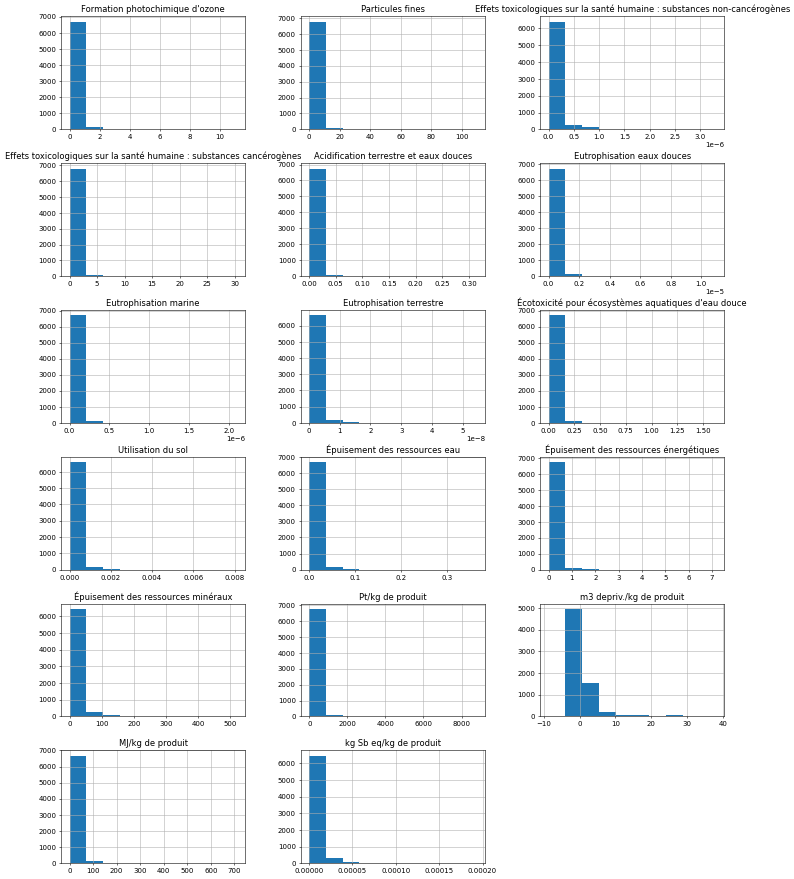

In [15]:
from math import ceil

fig, ax = plt.subplots(figsize=(3.5 * 4, 3.5 * ceil(len(data_ingredients_numbers.columns)/4)), dpi=50)
fig.tight_layout()
data_ingredients_numbers.hist(ax=ax, layout=(6,3), alpha=1)

In [16]:
data_ingredients_numbers.columns

Index(['Ciqual AGB', 'Ciqual code', 'Formation photochimique d'ozone',
       'Particules fines',
       'Effets toxicologiques sur la santé humaine : substances non-cancérogènes',
       'Effets toxicologiques sur la santé humaine : substances cancérogènes',
       'Acidification terrestre et eaux douces', 'Eutrophisation eaux douces',
       'Eutrophisation marine', 'Eutrophisation terrestre',
       'Écotoxicité pour écosystèmes aquatiques d'eau douce',
       'Utilisation du sol', 'Épuisement des ressources eau',
       'Épuisement des ressources énergétiques',
       'Épuisement des ressources minéraux', 'Pt/kg de produit',
       'm3 depriv./kg de produit', 'MJ/kg de produit',
       'kg Sb eq/kg de produit'],
      dtype='object')

In [17]:
print(f'Nom Français : {len(data_ingredients["Nom Français"].unique())} uniques')
print(data_ingredients["Nom Français"].unique())

Nom Français : 1060 uniques
['Base de pizza à la crème' 'Base de pizza tomatée'
 'Court-bouillon pour poissons, déshydraté' ...
 'Tortilla espagnole aux oignons (omelette aux pommes de terre et oignons)'
 'Veau, escalope panée, cuite' 'Volaille, croquette panée ou nuggets']


In [18]:
groupe = "Groupe d'aliment"
print(f'Groupe d\'aliment : {len(data_ingredients[groupe].unique())} uniques')
print(data_ingredients["Groupe d'aliment"].unique())

Groupe d'aliment : 11 uniques
['aides culinaires et ingrédients divers' 'aliments infantiles' 'boissons'
 'entrées et plats composés' 'fruits, légumes, légumineuses et oléagineux'
 'glaces et sorbets' 'lait et produits laitiers' 'matières grasses'
 'produits céréaliers' 'produits sucrés' 'viandes, œufs, poissons']


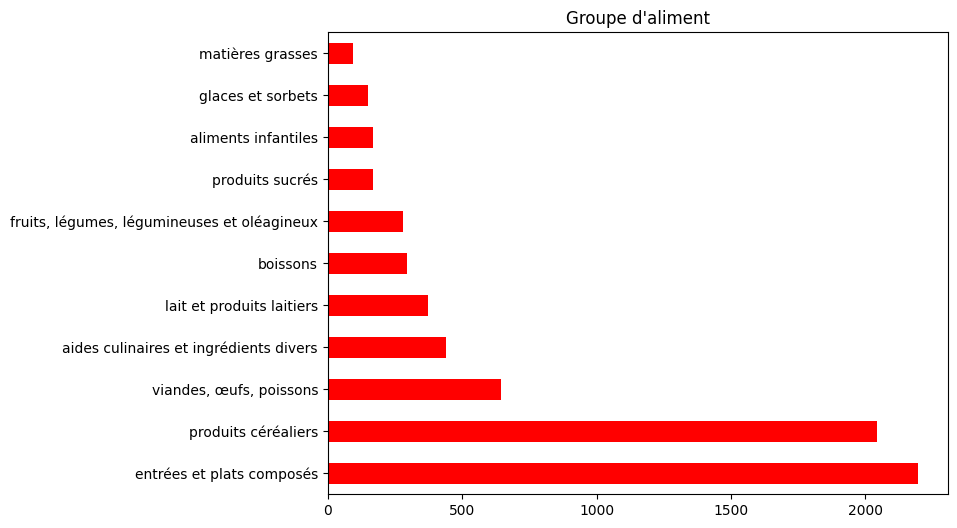

In [19]:
plt.figure(figsize=(8, 6))
plt.title("Groupe d'aliment")
data_ingredients["Groupe d'aliment"].value_counts().plot.barh(color='red')
plt.show()

In [20]:
sous_groupe = 'Sous-groupe d\'aliment'
print(f'{sous_groupe} : {len(data_ingredients[sous_groupe].unique())} uniques')
print(data_ingredients[sous_groupe].unique())

Sous-groupe d'aliment : 47 uniques
['ingrédients divers' 'aides culinaires' 'sauces' 'herbes' 'condiments'
 'épices' 'denrées destinées à une alimentation particulière'
 'céréales et biscuits infantiles' 'laits et boissons infantiles'
 'desserts infantiles' 'petits pots salés et plats infantiles'
 'boisson alcoolisées' 'boissons sans alcool' 'plats composés'
 'feuilletées et autres entrées' 'soupes' 'plats végétariens' 'sandwichs'
 'pizzas, tartes et crêpes salées' 'salades composées et crudités'
 'fruits à coque et graines oléagineuses'
 'pommes de terre et autres tubercules' 'fruits' 'légumes' 'glaces'
 'desserts glacés' 'sorbets' 'fromages'
 'produits laitiers frais et assimilés'
 'crèmes et spécialités à base de crème' 'huiles et graisses végétales'
 'margarines' 'gâteaux et pâtisseries' 'pains et viennoiseries'
 'céréales de petit-déjeuner et biscuits' 'pâtes, riz et céréales'
 'farines et pâtes à tarte' 'chocolats et produits à base de chocolat'
 'confiseries non chocolatées' 'co

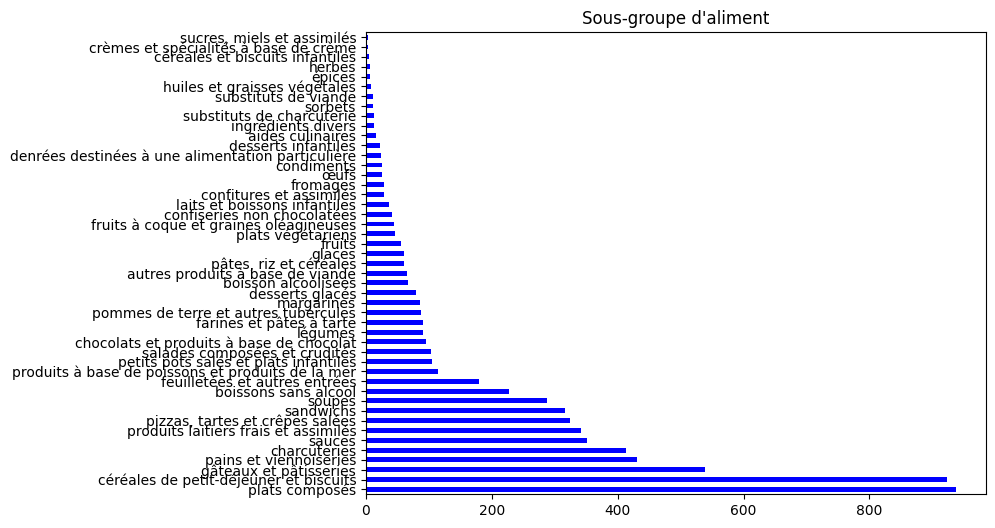

In [21]:
plt.figure(figsize=(8, 6))
plt.title("Sous-groupe d'aliment")
data_ingredients[sous_groupe].value_counts().plot.barh(color='blue')
plt.show()

## Dataset des données des étapes

In [22]:
data_etapes = pd.read_csv("data/AGRIBALYSE3-etapes.csv", sep=';') 
data_etapes.columns
print("Nombre de lignes: ",len(data_etapes))
print("Nombre de colonnes: ",len(data_etapes.columns))

Nombre de lignes:  2517
Nombre de colonnes:  132


In [23]:
for i in range(0,len(data_etapes.columns)):
    print("col ",i,": ",data_etapes.columns[i])

col  0 :  Code AGB
col  1 :  Code CIQUAL
col  2 :  Groupe d aliment
col  3 :  Sous-groupe d aliment
col  4 :  Nom du Produit en Français
col  5 :  LCI Name
col  6 :  DQR
col  7 :  Nom et code
col  8 :  Agriculture
col  9 :  Transformation
col  10 :  Emballage
col  11 :  Transport
col  12 :  Supermarché et distribution
col  13 :  Consommation
col  14 :  Total
col  15 :  Agriculture.1
col  16 :  Transformation.1
col  17 :  Emballage.1
col  18 :  Transport.1
col  19 :  Supermarché et distribution.1
col  20 :  Consommation.1
col  21 :  Total.1
col  22 :  Agriculture.2
col  23 :  Transformation.2
col  24 :  Emballage.2
col  25 :  Transport.2
col  26 :  Supermarché et distribution.2
col  27 :  Consommation.2
col  28 :  Total.2
col  29 :  Agriculture.3
col  30 :  Transformation.3
col  31 :  Emballage.3
col  32 :  Transport.3
col  33 :  Supermarché et distribution.3
col  34 :  Consommation.3
col  35 :  Total.3
col  36 :  Agriculture.4
col  37 :  Transformation.4
col  38 :  Emballage.4
col  39 

In [24]:
data_etapes.head()

,Code AGB,Code CIQUAL,Groupe d aliment,Sous-groupe d aliment,Nom du Produit en Français,LCI Name,DQR,Nom et code,Agriculture,Transformation,...,Emballage.16,Transport.16,Supermarché et distribution.16,Consommation.16,Total.16,DQR Overall,P,TiR,GR,TeR
0,11084,11084,aides culinaires et ingrédients divers,algues,Agar (algue). cru,Seaweed. agar. raw,2.99,Agar (algue). cru (11084),0.654812,0.500987,...,0.001043,0.000899,0.00046,0.000002,0.087558,2.99,3.51,1.32,4.33,2.79
1,11023,11023,aides culinaires et ingrédients divers,herbes,Ail séché. poudre,Garlic. powder. dried,4.11,Ail séché. poudre (11023),0.032661,0.000000,...,0.003464,0.000671,0.00044,0.000000,0.006605,4.11,4.27,4.39,2.79,5.00
2,11000,11000,aides culinaires et ingrédients divers,herbes,Ail. cru,Garlic. fresh,3.54,Ail. cru (11000),0.040826,0.000000,...,0.000000,0.000614,0.00055,0.000016,0.003717,3.54,2.74,4.28,2.80,4.34
3,11093,11093,aides culinaires et ingrédients divers,herbes,Aneth. frais,Dill. fresh,3.75,Aneth. frais (11093),0.082933,0.000000,...,0.001150,0.000583,0.00055,0.000016,0.004779,3.75,2.74,3.62,4.33,4.33
4,20995,20995,aides culinaires et ingrédients divers,algues,Ao-nori (Enteromorpha sp.). séchée ou déshydratée,Sea lettuce (Enteromorpha sp.). dried or dehyd...,2.99,Ao-nori (Enteromorpha sp.). séchée ou déshydra...,0.654812,0.500987,...,0.001043,0.000899,0.00046,0.000002,0.087558,2.99,3.51,1.32,4.33,2.79


In [25]:
data_etapes_numbers = data_etapes.copy()
for column in ['Code AGB', 'Code CIQUAL', 'Groupe d aliment', 'Sous-groupe d aliment', 'Nom du Produit en Français', 'LCI Name', 'DQR', 'Nom et code']:
    del data_etapes_numbers[column]
data_etapes_numbers.describe()

,Agriculture,Transformation,Emballage,Transport,Supermarché et distribution,Consommation,Total,Agriculture.1,Transformation.1,Emballage.1,...,Emballage.16,Transport.16,Supermarché et distribution.16,Consommation.16,Total.16,DQR Overall,P,TiR,GR,TeR
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,...,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000
mean,0.568497,0.056137,0.022427,0.026166,0.007877,0.007634,0.688737,4.283405,0.495668,0.255115,...,0.001663,0.001282,0.000780,0.000709,0.021980,2.768179,3.037121,2.581499,2.418663,3.035769
std,0.846357,0.113741,0.029187,0.035878,0.005025,0.012183,0.878109,7.485869,1.460170,0.337422,...,0.003530,0.001305,0.000511,0.001195,0.043352,0.553180,0.836334,0.837981,0.902672,0.988390
min,0.000000,-0.069140,0.000000,0.000229,0.000000,0.000000,0.012978,0.000000,0.000000,0.000000,...,0.000000,0.000007,0.000000,0.000000,0.000618,1.200000,1.140000,1.000000,1.000000,1.090000
25%,0.080592,0.001440,0.015065,0.014988,0.004642,0.000000,0.158600,0.389160,0.008503,0.143911,...,0.000046,0.000654,0.000443,0.000000,0.007195,2.380000,2.400000,2.020000,1.720000,2.260000
50%,0.241774,0.031835,0.018973,0.017594,0.008938,0.002455,0.355309,1.545345,0.194475,0.262657,...,0.000765,0.000946,0.000912,0.000263,0.012741,2.680000,2.870000,2.540000,2.330000,2.930000
75%,0.678931,0.056153,0.023715,0.024428,0.009087,0.006509,0.874124,4.922460,0.373338,0.288141,...,0.001043,0.001225,0.000915,0.000698,0.024825,3.090000,3.690000,3.130000,3.020000,3.630000
max,5.870899,2.474593,0.885589,0.897575,0.050257,0.130910,5.984957,51.263481,19.052315,9.769783,...,0.042448,0.015264,0.005081,0.006954,1.286939,4.870000,5.000000,4.840000,4.920000,5.000000


/tmp/ipykernel_13543/869185158.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data_etapes_numbers.hist(ax=ax, layout=(45,3), alpha=1)


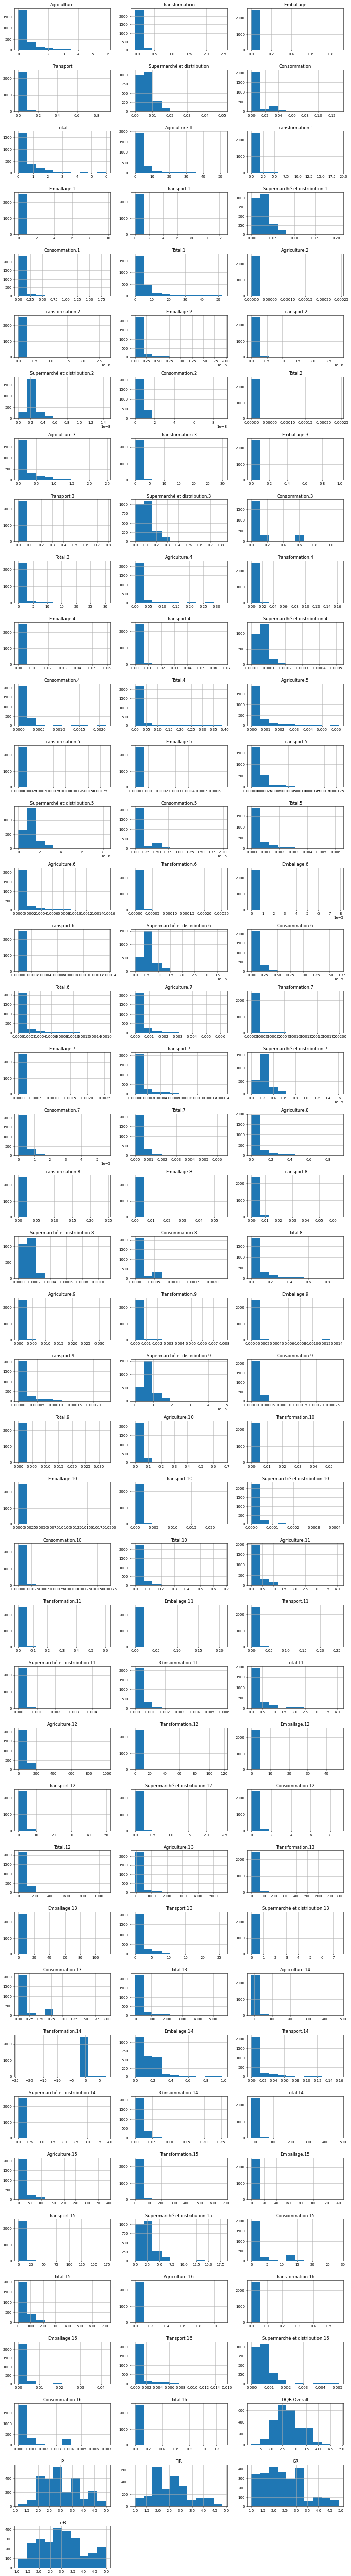

In [26]:
from math import ceil

fig, ax = plt.subplots(figsize=(3.5 * 4, 3.5 * ceil(len(data_etapes_numbers.columns)/4)), dpi=50)
data_etapes_numbers.hist(ax=ax, layout=(45,3), alpha=1)
fig.tight_layout()

## Expérimentations

Maintenant que nous connaissons un peu plus en détails le contenu de nos données, nous allons mener différentes expérimentations d'apprentissages supervisés et d'apprentissages non supervisés.

### Prédiction du groupe d'aliments des ingrédients

In [27]:
groupe = data_ingredients['Groupe d\'aliment'].unique()
print(groupe)
print('Nombre de classes :', groupe.size)

['aides culinaires et ingrédients divers' 'aliments infantiles' 'boissons'
 'entrées et plats composés' 'fruits, légumes, légumineuses et oléagineux'
 'glaces et sorbets' 'lait et produits laitiers' 'matières grasses'
 'produits céréaliers' 'produits sucrés' 'viandes, œufs, poissons']
Nombre de classes : 11


Dans notre base d'apprentissage, nous allons nous intéresser uniquement aux attributs numériques de notre dataset. Nous allons ignorer les attributs des différents codes que nous estimons non pertinents. Pour finir, nous allons standardiser le dataset.

In [28]:
del data_ingredients_numbers['Ciqual AGB']
del data_ingredients_numbers['Ciqual code']
data_ingredients_numbers.columns

Index(['Formation photochimique d'ozone', 'Particules fines',
       'Effets toxicologiques sur la santé humaine : substances non-cancérogènes',
       'Effets toxicologiques sur la santé humaine : substances cancérogènes',
       'Acidification terrestre et eaux douces', 'Eutrophisation eaux douces',
       'Eutrophisation marine', 'Eutrophisation terrestre',
       'Écotoxicité pour écosystèmes aquatiques d'eau douce',
       'Utilisation du sol', 'Épuisement des ressources eau',
       'Épuisement des ressources énergétiques',
       'Épuisement des ressources minéraux', 'Pt/kg de produit',
       'm3 depriv./kg de produit', 'MJ/kg de produit',
       'kg Sb eq/kg de produit'],
      dtype='object')

In [29]:
X = clust.normalisation(data_ingredients_numbers)
X = np.array(X)
X

array([[0.01524262, 0.0143953 , 0.01383906, ..., 0.19157954, 0.01137834,
        0.07664894],
       [0.00538625, 0.00363527, 0.01797869, ..., 0.18803108, 0.02151899,
        0.01201524],
       [0.01972279, 0.01803967, 0.03172709, ..., 0.1946791 , 0.03291139,
        0.0885606 ],
       ...,
       [0.00267477, 0.00192017, 0.00407305, ..., 0.18699445, 0.00210407,
        0.00515217],
       [0.00950514, 0.0067775 , 0.02361994, ..., 0.19106258, 0.04616268,
        0.03302887],
       [0.07717028, 0.05500524, 0.22218148, ..., 0.27108246, 0.13559003,
        0.13131328]])

In [30]:
groupe = data_ingredients['Groupe d\'aliment']
Y = np.zeros(len(data_ingredients['Groupe d\'aliment']), dtype=int)
for index, value in enumerate(groupe.unique()): Y[np.where(groupe == value)[0]] = index
np.unique(Y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

### Visualisation des données

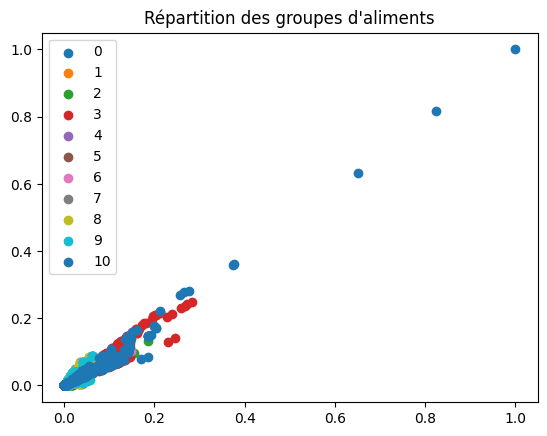

In [31]:
fig, ax = plt.subplots()
plt.title("Répartition des groupes d'aliments")
scatter_x = X
group = Y
for g in np.unique(group):
    i = np.where(group == g)
    ax.scatter(scatter_x[i][:,0], scatter_x[i][:,1], label=g)
ax.legend()
plt.show()    

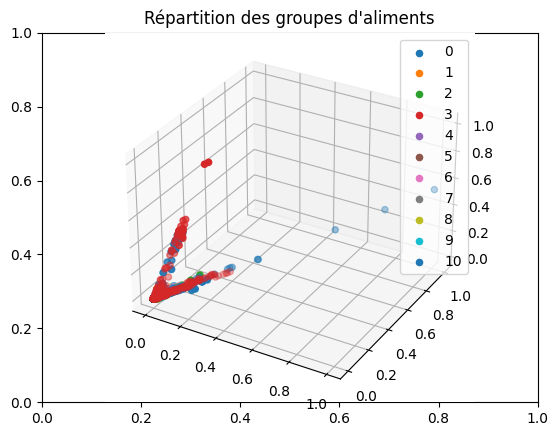

In [32]:
fig, ax = plt.subplots()
ax = fig.add_subplot(111, projection='3d')
plt.title("Répartition des groupes d'aliments")
scatter_x = X
group = Y
for g in np.unique(group):
    i = np.where(group == g)
    ax.scatter(scatter_x[i][:,0], scatter_x[i][:,1], scatter_x[i][:,4], label=g)
ax.legend()
plt.show()  

## Prédiction du groupe d'aliment via algorithme kNN

Nous allons utiliser le classifier KNN afin de prédire la classe de chaque ingrédient. Ensuite, par validation croisée, nous allons observer la performance de notre classifieur.

In [33]:
permut = np.random.permutation(np.arange(Y.size))
X_permut = X[permut]
Y_permut = Y[permut]
Y_permut

array([10,  3,  8, ...,  3,  3,  8])

In [34]:
X_permut[1]

array([0.00502858, 0.00341204, 0.01686836, 0.01793026, 0.0032631 ,
       0.00240308, 0.00321393, 0.0041391 , 0.00124794, 0.01046082,
       0.00327507, 0.00089572, 0.00401042, 0.00270834, 0.18839171,
       0.02189816, 0.01340214])

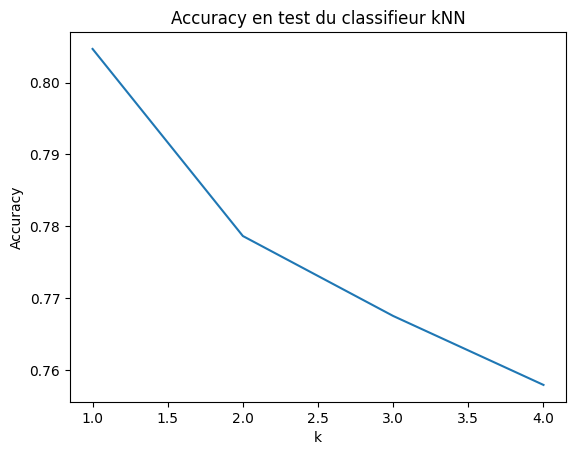

In [35]:
# on stocke les accuracies dans une liste :
accuracies_test = []
accuracies_app = []

# seuil max des valeurs de k à regarder:
seuil_k = 5

# toutes les valeurs de k à regarder:
valeurs_k = [k for k in range(1, seuil_k, 1)]

# Nombre d'itérations voulues pour la validation croisée:
nb_iter = 10

# Liste pour stocker les taux de bonne classification à chaque itération
perf_app = []
perf_test = []

for k in valeurs_k:
    for i in range(nb_iter):
        Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(X_permut, Y_permut, nb_iter, i)
        KNN = cl.ClassifierKNN_MC(X.shape[1], k, 11)
        KNN.train(Xapp,Yapp)
        perf_app.append(KNN.accuracy(Xapp,Yapp))
        perf_test.append(KNN.accuracy(Xtest,Ytest))
    
    accuracies_test.append(np.mean(perf_test))
    accuracies_app.append(np.mean(perf_app))
    
    
# Tracer de la courbe des variations
plt.plot(valeurs_k, accuracies_test)  
plt.title('Accuracy en test du classifieur kNN')
plt.ylabel("Accuracy")
plt.xlabel("k")
plt.show()

In [36]:
n = 10
knn = cl.ClassifierKNN_MC(X.shape[1], 1, 11)
Acc_A = []
Acc_T = []
for i in range(n):
    X_A, Y_A, X_T, Y_T = ut.crossval_strat(X_permut, Y_permut, n, i)
    trained = copy.deepcopy(knn)
    trained.train(X_A, Y_A)
    Acc_A.append(trained.accuracy(X_A, Y_A))
    Acc_T.append(trained.accuracy(X_T, Y_T))

In [37]:
print('Performances en apprentissage :', Acc_A)
print('Moyenne et variance :', ut.analyse_perfs(Acc_A))

Performances en apprentissage : [0.9899595141700405, 0.9808906882591093, 0.9901214574898786, 0.9875303643724697, 0.9894736842105263, 0.9897975708502025, 0.9883400809716599, 0.9896356275303644, 0.9891497975708502, 0.9881781376518218]
Moyenne et variance : (0.9883076923076922, 6.7704109229786035e-06)


In [38]:
print('Performances en test :', Acc_T)
print('Moyenne et variance :', ut.analyse_perfs(Acc_T))

Performances en test : [0.8237885462555066, 0.8223201174743024, 0.7944199706314243, 0.788546255506608, 0.7723935389133627, 0.7826725403817915, 0.8281938325991189, 0.8061674008810573, 0.8046989720998532, 0.8237885462555066]
Moyenne et variance : (0.8046989720998532, 0.0003488866032288179)


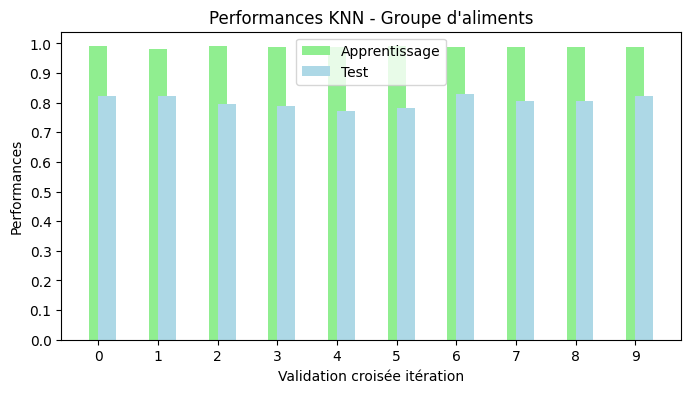

In [39]:
plt.figure(figsize=(8, 4))
plt.title('Performances KNN - Groupe d\'aliments')
plt.bar(range(n), Acc_A, width=0.3, color='lightgreen', align='center', label='Apprentissage')
plt.bar(range(n), Acc_T, width=0.3, color='lightblue', align='edge', label='Test')
plt.xticks(range(n))
plt.yticks(np.arange(0, 1.1, .1))
plt.xlabel('Validation croisée itération')
plt.ylabel('Performances')
plt.legend()
plt.show()

## Prédiction du groupe d'aliment via Arbre de Décision

In [40]:
n = 10
arbre = cl.ClassifierArbreNumerique(X.shape[1], .0, data_ingredients_numbers.columns)
Acc_A = []
Acc_T = []
for i in range(n):
    X_A, Y_A, X_T, Y_T = ut.crossval_strat(X_permut, Y_permut, n, i)
    trained = copy.deepcopy(arbre)
    trained.train(X_A, Y_A)
    Acc_A.append(trained.accuracy(X_A, Y_A))
    Acc_T.append(trained.accuracy(X_T, Y_T))

In [41]:
print('Performances en apprentissage :', Acc_A)
print('Moyenne et variance :', ut.analyse_perfs(Acc_A))

Performances en apprentissage : [0.991417004048583, 0.9906072874493927, 0.991578947368421, 0.9906072874493927, 0.9912550607287449, 0.991417004048583, 0.9902834008097166, 0.9912550607287449, 0.9910931174089069, 0.9906072874493927]
Moyenne et variance : (0.9910121457489879, 1.7964562605516716e-07)


In [42]:
print('Performances en test :', Acc_T)
print('Moyenne et variance :', ut.analyse_perfs(Acc_T))

Performances en test : [0.7767988252569751, 0.7973568281938326, 0.775330396475771, 0.7900146842878121, 0.7444933920704846, 0.7841409691629956, 0.7929515418502202, 0.7797356828193832, 0.7812041116005873, 0.8002936857562408]
Moyenne et variance : (0.7822320117474303, 0.00022427500371958805)


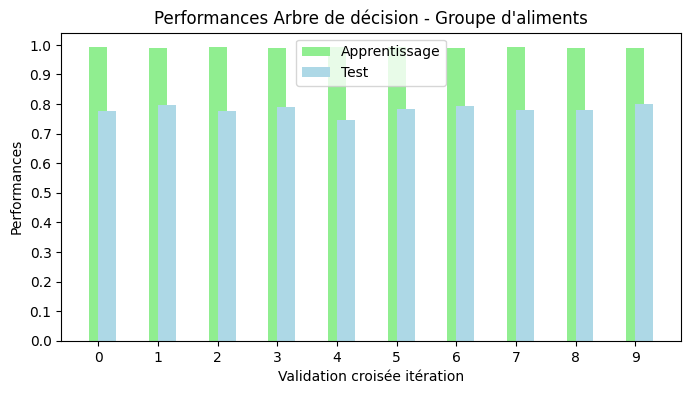

In [43]:
plt.figure(figsize=(8, 4))
plt.title('Performances Arbre de décision - Groupe d\'aliments')
plt.bar(range(n), Acc_A, width=0.3, color='lightgreen', align='center', label='Apprentissage')
plt.bar(range(n), Acc_T, width=0.3, color='lightblue', align='edge', label='Test')
plt.xticks(range(n))
plt.yticks(np.arange(0, 1.1, .1))
plt.xlabel('Validation croisée itération')
plt.ylabel('Performances')
plt.legend()
plt.show()

**Note** : Les performances de nos classifieurs sont assez bonnes, en entrainement et en test ; elles sont généralement supérieure à 75%. En d'autres termes, en connaissant différents indicateurs d'impacts environnementaux des différents ingrédients, il est possible de prédire le groupe auquel cet ingrédient appartient.

### Prédiction de la note DQR via kNN

La note DQR indique la qualité des informations sur un exemple donné. Elle varie entre 1 et 5, tel qu'une note de 1 signifie que les informations données sont très exactes et qu'une note de 5 signifie que les informations ne sont pas certaines.

Nous allons utiliser nos classifieurs afin de prédire pour chaque exemple du dataset data_synthese la target DQR.

In [44]:
data_synthese['DQR'].unique()

array([2.99, 4.11, 3.54, 3.75, 2.89, 3.19, 2.97, 3.37, 4.31, 3.95, 3.56,
       3.55, 1.78, 4.14, 2.02, 2.83, 3.73, 2.51, 2.98, 3.13, 2.95, 2.76,
       2.6 , 3.47, 2.46, 2.85, 2.49, 2.92, 3.18, 2.52, 2.47, 2.21, 2.34,
       2.09, 2.79, 2.9 , 2.82, 3.22, 2.78, 2.11, 2.18, 2.16, 2.84, 1.76,
       2.14, 2.35, 1.8 , 2.68, 2.25, 1.87, 3.35, 1.92, 2.58, 2.26, 2.75,
       2.72, 1.96, 2.64, 2.  , 3.09, 1.98, 2.93, 2.44, 2.87, 2.2 , 1.34,
       3.38, 3.97, 3.27, 3.03, 2.5 , 3.2 , 2.62, 3.04, 3.28, 3.71, 2.54,
       2.42, 3.11, 2.39, 2.8 , 2.4 , 3.29, 2.48, 3.07, 2.23, 2.01, 2.05,
       3.68, 3.02, 2.74, 3.31, 2.77, 2.63, 3.06, 3.01, 3.49, 2.31, 2.41,
       2.65, 2.29, 2.61, 3.3 , 1.95, 2.04, 2.38, 2.27, 3.33, 3.41, 2.06,
       2.7 , 2.69, 2.56, 2.07, 3.12, 2.13, 2.43, 2.32, 3.76, 3.39, 1.91,
       2.55, 2.66, 1.97, 3.05, 2.36, 2.22, 1.86, 1.82, 1.93, 1.75, 2.08,
       2.45, 2.88, 2.81, 1.83, 1.81, 3.63, 2.94, 2.57, 1.2 , 3.42, 1.3 ,
       1.94, 2.33, 3.23, 1.9 , 2.91, 2.71, 1.84, 1.

In [45]:
columns = ['Code AGB', 'Code CIQUAL', 'Groupe d\'aliment', 'Sous-groupe d\'aliment',
       'Nom du Produit en Français', 'LCI Name', 'code saison',
       'code avion', 'Livraison',
       'Matériau d\'emballage', 'Préparation']
data_synthese_numbers = data_synthese.copy()
for c in columns:
    del data_synthese_numbers[c]
data_synthese_numbers.describe()

,DQR,Score unique EF 3.1,Changement climatique,Appauvrissement de la couche d'ozone,Rayonnements ionisants,Formation photochimique d'ozone,Particules fines,Effets toxicologiques sur la santé humaine : substances non-cancérogènes,Effets toxicologiques sur la santé humaine : substances cancérogènes,Acidification terrestre et eaux douces,Eutrophisation eaux douces,Eutrophisation marine,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux
count,2517.000000,2517.000000,2517.000000,2.517000e+03,2517.000000,2517.000000,2.517000e+03,2.517000e+03,2.517000e+03,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,2.768164,0.688960,5.420520,5.383362e-07,1.016822,0.021626,5.735583e-07,1.074376e-07,3.885454e-09,0.078953,0.000842,0.028194,0.310529,54.213324,328.598126,5.726230,49.799158,2.201983e-05
std,0.553206,0.877068,7.760284,4.868753e-06,1.595941,0.044096,8.893528e-07,1.592089e-07,4.773390e-09,0.128077,0.002039,0.050167,0.532352,65.129370,663.745740,18.063484,54.560796,4.340914e-05
min,1.200000,0.013000,0.039400,2.710000e-09,0.023000,0.000120,5.370000e-09,1.210000e-09,5.850000e-11,0.000499,0.000013,0.000213,0.001140,0.678000,-40.000000,-23.100000,1.710000,6.180000e-07
25%,2.380000,0.161000,1.120000,1.200000e-07,0.302000,0.003570,8.110000e-08,2.510000e-08,9.600000e-10,0.009500,0.000203,0.005310,0.034100,13.500000,33.600000,0.905000,19.900000,7.270000e-06
50%,2.680000,0.356000,2.500000,2.060000e-07,0.670000,0.007240,2.370000e-07,5.580000e-08,2.360000e-09,0.031200,0.000444,0.012800,0.118000,34.100000,126.000000,2.090000,30.800000,1.280000e-05
75%,3.090000,0.874000,6.280000,5.650000e-07,1.100000,0.018000,7.060000e-07,1.130000e-07,5.020000e-09,0.094200,0.000862,0.028600,0.327000,63.900000,306.000000,5.410000,61.200000,2.480000e-05
max,4.870000,5.970000,52.200000,2.430000e-04,30.400000,0.390000,6.240000e-06,1.610000e-06,6.370000e-08,0.920000,0.032700,0.671000,4.070000,1090.000000,5580.000000,478.000000,711.000000,1.290000e-03


Nous allons rendre entières nos valeurs de DQR

In [46]:
Y_float = np.array(data_synthese_numbers['DQR'])
Y = Y_float.copy().astype(int)
np.unique(Y)

array([1, 2, 3, 4])

In [47]:
del data_synthese_numbers['DQR']
X = np.array(clust.normalisation(data_synthese_numbers))
print(X.shape)

(2517, 17)


### Visualisation des données

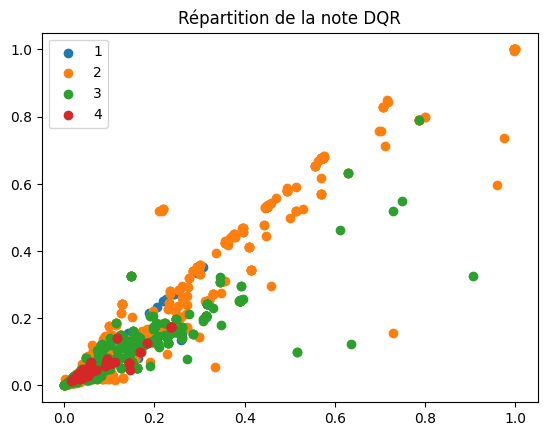

In [48]:
fig, ax = plt.subplots()
plt.title("Répartition de la note DQR")
scatter_x = X
group = Y
for g in np.unique(group):
    i = np.where(group == g)
    ax.scatter(scatter_x[i][:,0], scatter_x[i][:,1], label=g)
ax.legend()
plt.show()  

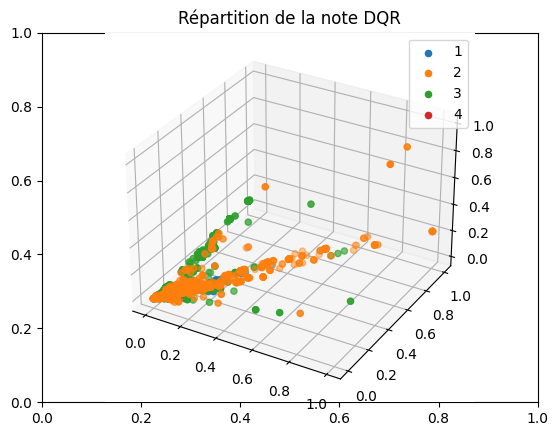

In [49]:
fig, ax = plt.subplots()
ax = fig.add_subplot(111, projection='3d')
plt.title("Répartition de la note DQR")
scatter_x = X
group = Y
for g in np.unique(group):
    i = np.where(group == g)
    ax.scatter(scatter_x[i][:,0], scatter_x[i][:,1], scatter_x[i][:,4], label=g)
ax.legend()
plt.show()  

In [50]:
permut = np.random.permutation(np.arange(Y.size))
X_permut = X[permut]
Y_permut = Y[permut]
Y_permut

array([3, 2, 2, ..., 3, 2, 2])

## Prédiction de la note DQR via algorithme kNN

In [51]:
n = 10
knn = cl.ClassifierKNN_MC(X.shape[1], 1, 11)
Acc_A = []
Acc_T = []
for i in range(n):
    X_A, Y_A, X_T, Y_T = ut.crossval_strat(X_permut, Y_permut, n, i)
    trained = copy.deepcopy(knn)
    trained.train(X_A, Y_A)
    Acc_A.append(trained.accuracy(X_A, Y_A))
    Acc_T.append(trained.accuracy(X_T, Y_T))

In [52]:
print('Performances en apprentissage :', Acc_A)
print('Moyenne et variance :', ut.analyse_perfs(Acc_A))

Performances en apprentissage : [0.9232127096204766, 0.9302736098852604, 0.9258605472197705, 0.9196822594880847, 0.9302736098852604, 0.9329214474845543, 0.9302736098852604, 0.9187996469549867, 0.9338040600176523, 0.9280670785525155]
Moyenne et variance : (0.9273168578993822, 2.5008004275179042e-05)


In [53]:
print('Performances en test :', Acc_T)
print('Moyenne et variance :', ut.analyse_perfs(Acc_T))

Performances en test : [0.7928286852589641, 0.7768924302788844, 0.7689243027888446, 0.7768924302788844, 0.7689243027888446, 0.7808764940239044, 0.7689243027888446, 0.7848605577689243, 0.7410358565737052, 0.7529880478087649]
Moyenne et variance : (0.7713147410358566, 0.0002069808415739429)


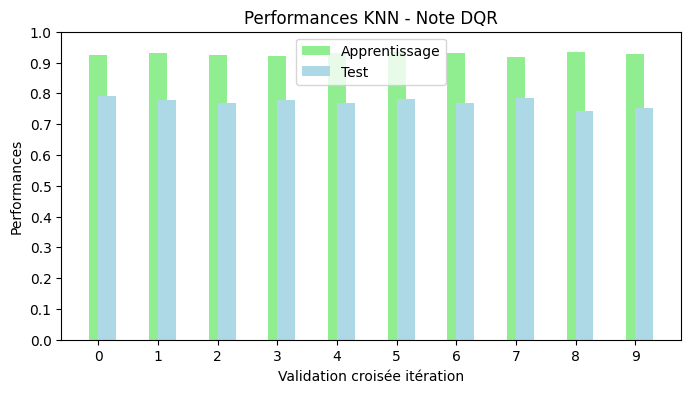

In [54]:
plt.figure(figsize=(8, 4))
plt.title('Performances KNN - Note DQR')
plt.bar(range(n), Acc_A, width=0.3, color='lightgreen', align='center', label='Apprentissage')
plt.bar(range(n), Acc_T, width=0.3, color='lightblue', align='edge', label='Test')
plt.xticks(range(n))
plt.yticks(np.arange(0, 1.1, .1))
plt.xlabel('Validation croisée itération')
plt.ylabel('Performances')
plt.legend()
plt.show()

## Prédiction de la note DQR via Arbre de Décision

In [55]:
n = 10
arbre = cl.ClassifierArbreNumerique(X.shape[1], .0, data_ingredients_numbers.columns)
Acc_A = []
Acc_T = []
for i in range(n):
    X_A, Y_A, X_T, Y_T = ut.crossval_strat(X_permut, Y_permut, n, i)
    trained = copy.deepcopy(arbre)
    trained.train(X_A, Y_A)
    Acc_A.append(trained.accuracy(X_A, Y_A))
    Acc_T.append(trained.accuracy(X_T, Y_T))

In [56]:
print('Performances en apprentissage :', Acc_A)
print('Moyenne et variance :', ut.analyse_perfs(Acc_A))

Performances en apprentissage : [0.9399823477493381, 0.939541041482789, 0.940423654015887, 0.941306266548985, 0.93909973521624, 0.93909973521624, 0.93909973521624, 0.93909973521624, 0.9443954104148279, 0.9399823477493381]
Moyenne et variance : (0.9402030008826123, 2.4246527001478104e-06)


In [57]:
print('Performances en test :', Acc_T)
print('Moyenne et variance :', ut.analyse_perfs(Acc_T))

Performances en test : [0.7450199203187251, 0.7609561752988048, 0.7091633466135459, 0.7529880478087649, 0.7609561752988048, 0.7370517928286853, 0.7250996015936255, 0.7888446215139442, 0.6932270916334662, 0.7131474103585658]
Moyenne et variance : (0.7386454183266933, 0.000753003920572688)


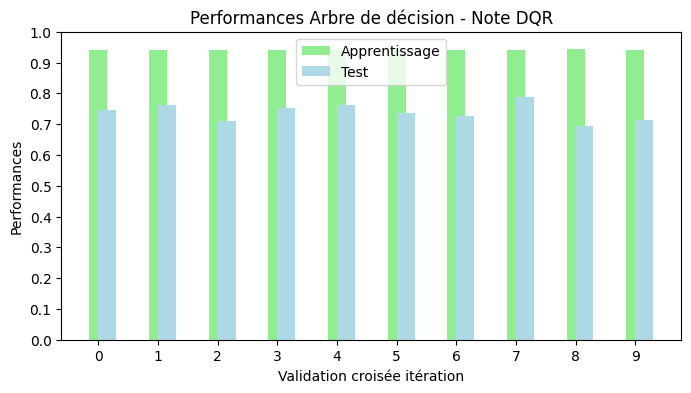

In [58]:
plt.figure(figsize=(8, 4))
plt.title('Performances Arbre de décision - Note DQR')
plt.bar(range(n), Acc_A, width=0.3, color='lightgreen', align='center', label='Apprentissage')
plt.bar(range(n), Acc_T, width=0.3, color='lightblue', align='edge', label='Test')
plt.xticks(range(n))
plt.yticks(np.arange(0, 1.1, .1))
plt.xlabel('Validation croisée itération')
plt.ylabel('Performances')
plt.legend()
plt.show()

**Note** : Les performances de nos classifieurs sont assez bonnes, en entrainement et en test ; elles sont généralement supérieure à 75%. En d'autres termes, en connaissant différents indicateurs d'impacts environnementaux des différents ingrédients, il est possible de prédire la note DQR associée à ces indicateurs.

## K-Moyennes sur le dataset des étapes

Nous allons appliquer l'algorithme des K-Moyennes sur le dataset data_etape, faire différentes analyses et tirer des conclusions.

In [59]:
X = np.array(clust.normalisation(data_etapes_numbers))
X

array([[0.11153514, 0.22413008, 0.02760116, ..., 0.08333333, 0.8494898 ,
        0.43478261],
       [0.00556321, 0.02718055, 0.0572599 , ..., 0.8828125 , 0.45663265,
        1.        ],
       [0.00695401, 0.02718055, 0.        , ..., 0.85416667, 0.45918367,
        0.83120205],
       ...,
       [0.12257328, 0.02718055, 0.02021107, ..., 0.40104167, 0.40561224,
        1.        ],
       [0.14966909, 0.02718055, 0.02142434, ..., 0.421875  , 0.34183673,
        1.        ],
       [0.10782741, 0.07789915, 0.04487294, ..., 0.34375   , 0.16071429,
        0.59590793]])

### Evaluation des performances

Evaluons les performances de notre partition avec son index de Dunn en fonction de k.

In [66]:
K = np.arange(1, 13)
dunn = []
for k in K:
    C, U = clust.kmoyennes(k, X, epsilon=0.05, iter_max=100)
    dunn.append(clust.index_dunn(X, U))

iteration 0 Inertie : 2540.0674 Difference: 2540.0674
iteration 1 Inertie : 2540.0674 Difference: 0.0000
iteration 0 Inertie : 2169.7919 Difference: 2169.7919
iteration 1 Inertie : 2021.2551 Difference: 148.5369
iteration 2 Inertie : 1976.0278 Difference: 45.2273
iteration 3 Inertie : 1955.7976 Difference: 20.2302
iteration 4 Inertie : 1953.3965 Difference: 2.4011
iteration 5 Inertie : 1951.7166 Difference: 1.6798
iteration 6 Inertie : 1951.5473 Difference: 0.1693
iteration 7 Inertie : 1951.5177 Difference: 0.0296
iteration 0 Inertie : 2161.1882 Difference: 2161.1882
iteration 1 Inertie : 1963.4503 Difference: 197.7379
iteration 2 Inertie : 1833.9752 Difference: 129.4751
iteration 3 Inertie : 1814.0591 Difference: 19.9161
iteration 4 Inertie : 1811.4429 Difference: 2.6161
iteration 5 Inertie : 1810.7995 Difference: 0.6434
iteration 6 Inertie : 1809.9344 Difference: 0.8651
iteration 7 Inertie : 1808.8410 Difference: 1.0935
iteration 8 Inertie : 1807.9589 Difference: 0.8821
iteration 9 I

iteration 2 Inertie : 1191.2930 Difference: 76.4789
iteration 3 Inertie : 1147.2433 Difference: 44.0497
iteration 4 Inertie : 1125.1869 Difference: 22.0564
iteration 5 Inertie : 1113.0884 Difference: 12.0985
iteration 6 Inertie : 1099.3200 Difference: 13.7683
iteration 7 Inertie : 1089.1175 Difference: 10.2026
iteration 8 Inertie : 1085.5661 Difference: 3.5514
iteration 9 Inertie : 1084.0748 Difference: 1.4913
iteration 10 Inertie : 1083.0158 Difference: 1.0590
iteration 11 Inertie : 1082.1705 Difference: 0.8453
iteration 12 Inertie : 1082.0476 Difference: 0.1229
iteration 13 Inertie : 1082.0182 Difference: 0.0294
iteration 0 Inertie : 1485.8093 Difference: 1485.8093
iteration 1 Inertie : 1284.3302 Difference: 201.4791
iteration 2 Inertie : 1199.7834 Difference: 84.5468
iteration 3 Inertie : 1150.5290 Difference: 49.2544
iteration 4 Inertie : 1119.8308 Difference: 30.6982
iteration 5 Inertie : 1068.7451 Difference: 51.0857
iteration 6 Inertie : 1050.6868 Difference: 18.0583
iteration 7

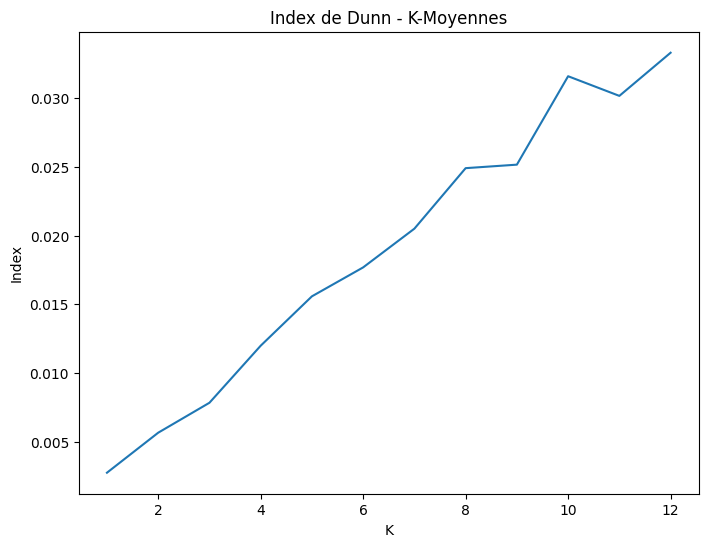

In [67]:
plt.figure(figsize=(8, 6))
plt.title('Index de Dunn - K-Moyennes')
plt.plot(K, dunn)
plt.xlabel('K')
plt.ylabel('Index')
plt.show()

## Test K = 11

Nous allons observer si il existe une correlation entre les clusters et le groupe d'aliments

In [68]:
C, U = clust.kmoyennes(11, X, epsilon=0.05, iter_max=100)

iteration 0 Inertie : 1564.3054 Difference: 1564.3054
iteration 1 Inertie : 1301.9020 Difference: 262.4035
iteration 2 Inertie : 1202.3263 Difference: 99.5757
iteration 3 Inertie : 1165.8764 Difference: 36.4499
iteration 4 Inertie : 1151.3062 Difference: 14.5701
iteration 5 Inertie : 1131.6358 Difference: 19.6704
iteration 6 Inertie : 1123.3042 Difference: 8.3316
iteration 7 Inertie : 1119.3358 Difference: 3.9684
iteration 8 Inertie : 1115.1544 Difference: 4.1814
iteration 9 Inertie : 1106.5678 Difference: 8.5867
iteration 10 Inertie : 1096.3103 Difference: 10.2575
iteration 11 Inertie : 1090.3783 Difference: 5.9321
iteration 12 Inertie : 1082.9452 Difference: 7.4331
iteration 13 Inertie : 1076.6432 Difference: 6.3020
iteration 14 Inertie : 1072.0947 Difference: 4.5485
iteration 15 Inertie : 1067.3898 Difference: 4.7049
iteration 16 Inertie : 1061.2770 Difference: 6.1128
iteration 17 Inertie : 1051.5162 Difference: 9.7608
iteration 18 Inertie : 1048.9404 Difference: 2.5758
iteration 19

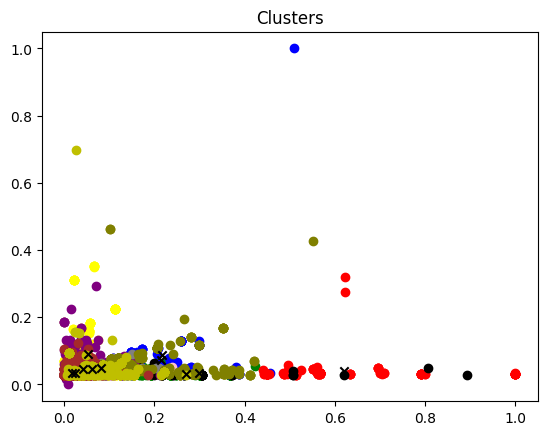

In [69]:
clust.affiche_resultat_multi(X, C, U)

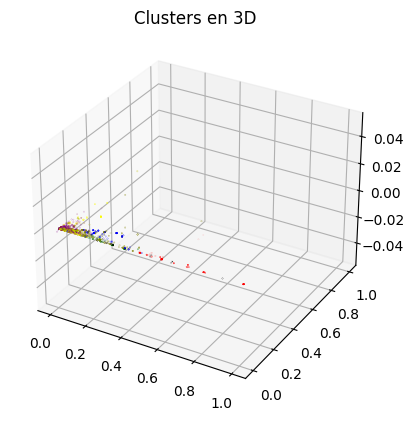

In [70]:
clust.affiche_resultat_multi_3d(X, C, U)

In [71]:
for (centre, indices) in U.items():
    print("Cluster numéro :",centre)
    count = np.unique(np.array(data_etapes.iloc[indices,[2]]), return_counts=True)
    print(count[0][np.argmax(count[1])])

Cluster numéro : 0
viandes. œufs. poissons
Cluster numéro : 1
viandes. œufs. poissons
Cluster numéro : 2
lait et produits laitiers
Cluster numéro : 3
viandes. œufs. poissons
Cluster numéro : 4
viandes. œufs. poissons
Cluster numéro : 5
fruits. légumes. légumineuses et oléagineux
Cluster numéro : 6
produits céréaliers
Cluster numéro : 7
entrées et plats composés
Cluster numéro : 8
viandes. œufs. poissons
Cluster numéro : 9
fruits. légumes. légumineuses et oléagineux
Cluster numéro : 10
viandes. œufs. poissons


Le clustering ne permet pas de faire ressortir un groupe d'aliment unique different pour chacun de nos clusters (environ 6 sur 11 ressortent du clustering).